In [4]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import ipywidgets as widgets

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Neural Network Dynamics:

$$\dot{r}_{1} = \gamma[ -r_{1} + tanh(\rho m_{12}r_{2} + \sigma w_{1}u)]$$
$$\dot{r}_{2} = \gamma[ -r_{2} + tanh(\rho m_{21}r_{1} + \sigma w_{2}u)]$$

In [5]:
def f(t, z, gamma, rho, sigma, m12, m21, u, w1, w2):
    r1, r2 = z
    z_next = np.zeros(2)
    z_next[0] = gamma*(-r1 + np.tanh(rho*m12*r2 + sigma*w1*(u)))
    z_next[1] = gamma*(-r2 + np.tanh(rho*m21*r1 + sigma*w2*(u)))
    return z_next

## Nullclines:

$$ r_{1} = tanh(\rho m_{12}r_{2} + \sigma w_{1}u)$$
$$ r_{2} = tanh(\rho m_{21}r_{1} + \sigma w_{2}u)$$


In [6]:
def r1_null(r2, rho, sigma, m12, u, w1):
    return np.tanh(rho*m12*r2 + sigma*w1*(u))

def r2_null(r1, rho, sigma, m21, u, w2):
    return np.tanh(rho*m21*r1 + sigma*w2*(u))

In [7]:
# System parameters.
gamma = 10
rho = 0.9
sigma = 0.01
m12 = 0.1
m21 = 0.1
u = 100
w1 = 0.1
w2 = 0 

# Solve ODE. 
r10 = r20 = 0
t_span = [0, 10]
z0 = [r10, r20]
params = (gamma, rho, sigma, m12, m21, u, w1, w2)
sln = solve_ivp(f, t_span, z0, args=params, dense_output=True)
t = np.linspace(0, 10, 10000)
z = sln.sol(t)

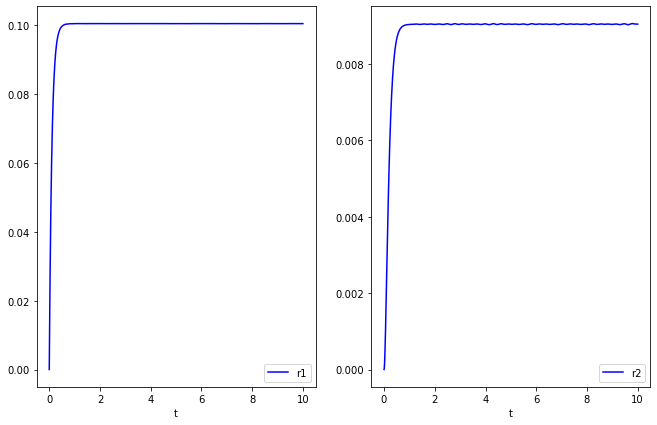

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,7))
ax1.plot(t , z[0], "b-", label='r1')
ax2.plot(t , z[1], "b-", label='r2')
    
ax1.set_xlabel("t")
ax2.set_xlabel("t")

ax1.legend()
ax2.legend()

In [18]:
@widgets.interact(t_end=(0, 10000, 10))
def update(t_end=0):
    fig, ax1 = plt.subplots(1, 1, figsize=(11,7))
    r_range = np.linspace(-10, 10, 1000)
    ax1.plot(r1_null(r_range, rho, sigma, m12, u, w1), r_range)
    ax1.plot(r_range, r2_null(r_range, rho, sigma, m21, u, w2))
    ax1.plot(z[0][:t_end], z[1][:t_end])  
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1)

interactive(children=(IntSlider(value=0, description='t_end', max=10000, step=10), Output()), _dom_classes=('w…

In [14]:
def f_null_1(r2, a, b):
    return np.tanh(a*r2 + b)

def f_null_2(r1, a, b):
    return np.tanh(a*r1 + b)

In [15]:
@widgets.interact(a=(0, 5, 0.1), b=(0, 5, 0.1), c=(0, 5, 0.1), d=(0, 5, 0.1))
def update(a=0.1, b=0.1, c=0.1, d=0.1):
    fig, ax = plt.subplots(1, 1, figsize=(11,7))
    r_range = np.linspace(-10, 10, 1000)
    ax.plot(r_range, f_null_1(r_range, a, b))
    ax.plot(f_null_1(r_range, c, d), r_range)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)

interactive(children=(FloatSlider(value=0.1, description='a', max=5.0), FloatSlider(value=0.1, description='b'…